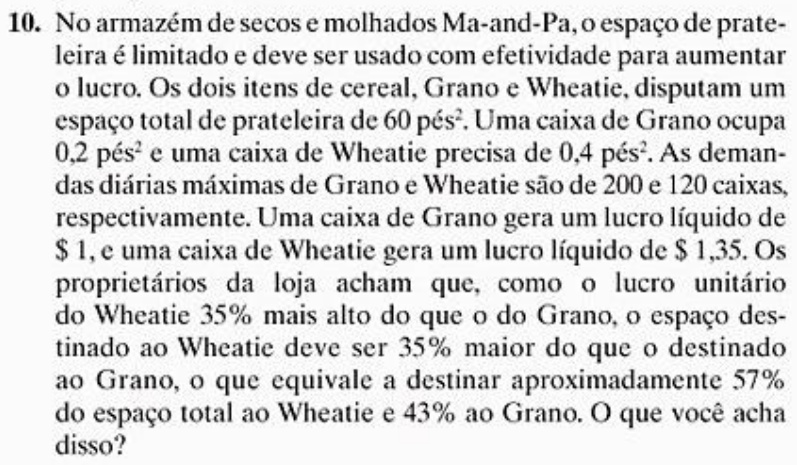

In [1]:
%pip install cplex
%pip install docplex

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from docplex.mp.model import Model

# Criação do modelo com um nome descritivo
model = Model('Alocacao_Prateleira_MaAndPa')

In [3]:
# --- Parâmetros extraídos do enunciado ---

# Nomes dos produtos para referência
produtos = ['Grano', 'Wheatie']

# Dados financeiros e de espaço
lucro_por_caixa = {'Grano': 1.00, 'Wheatie': 1.35}
espaco_por_caixa = {'Grano': 0.2, 'Wheatie': 0.4} # em pés²

# Limites e demandas
espaco_total_prateleira = 60 # em pés²
demanda_maxima = {'Grano': 200, 'Wheatie': 120}

In [4]:
# 1. Variáveis de Decisão
# Número de caixas a serem estocadas de cada cereal
num_caixas = model.integer_var_dict(produtos, name='Caixas')
# Usamos integer_var_dict pois não se pode estocar frações de caixas.

# 2. Função Objetivo
# Maximizar o lucro líquido total
expressao_lucro = (lucro_por_caixa[p] * num_caixas[p] for p in produtos)
soma_lucro_total = model.sum(expressao_lucro)
model.maximize(soma_lucro_total)


# 3. Restrições

# Restrição 1: Espaço Total de Prateleira
expressao_espaco_usado = (espaco_por_caixa[p] * num_caixas[p] for p in produtos)
soma_espaco_usado = model.sum(expressao_espaco_usado)
restr_espaco_logica = soma_espaco_usado <= espaco_total_prateleira
model.add_constraint(restr_espaco_logica, ctname='limite_espaco_total')

# Restrição 2: Demanda Máxima de cada produto
for p in produtos:
    restr_demanda_logica = num_caixas[p] <= demanda_maxima[p]
    model.add_constraint(restr_demanda_logica, ctname=f'demanda_max_{p}')

In [5]:
# Define um tempo limite para o solver (opcional)
model.parameters.timelimit = 120

# Aciona o solver para encontrar a solução
print("--- Resolvendo o modelo ---")
solucao = model.solve(log_output=True)

print('\n------ SOLUÇÃO ÓTIMA ------\n')
print(solucao)

--- Resolvendo o modelo ---
Version identifier: 22.1.2.0 | 2024-12-10 | f4cec290b
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               120
Found incumbent of value 0.000000 after 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 3 rows and 0 columns.
MIP Presolve added 1 rows and 1 columns.
MIP Presolve modified 1 coefficients.
Reduced MIP has 1 rows, 3 columns, and 3 nonzeros.
Reduced MIP has 0 binaries, 3 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 1 rows and 1 columns.
MIP Presolve added 1 rows and 1 columns.
Reduced MIP has 1 rows, 3 columns, and 3 nonzeros.
Reduced MIP has 0 binaries, 3 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.00 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 16 threads.
Root relaxation solution time = 0.00 s